<h1>Klassisk mekanikk</h1>

<h2>Fjær</h2>

La oss studere bevegelsen for et objekt med masse $m$ på en fjær med fjærkonstant $k$ og likevektslengde $L$.

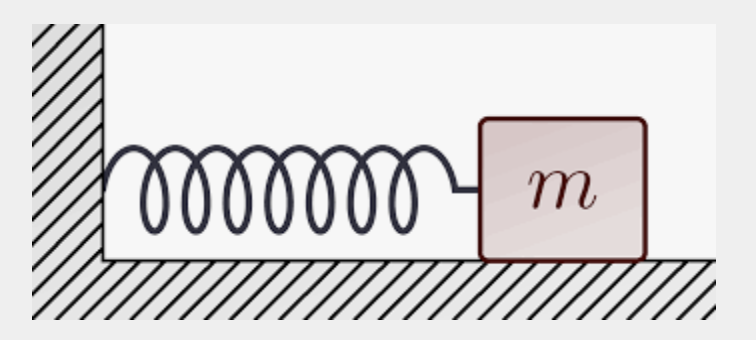

La oss kalle fjærens lengde $x$. Når fjæren er lenger eller kortere enn likevektslengden virker en kreft $F = -k (x - L)$. Newtons bevegelseligning tar formen

$$m \, x''(t) = -k (x-L)$$.

Programmet under løser Newtons ligning på tre måter: 1) med en formel for den eksakte løsningen, 2) med Eulers metode, 3) med Runge-Kuttas metode. Hvor nøyaktig er Eulers metode? Hvor nøyaktig er Runge-Kuttas metode?

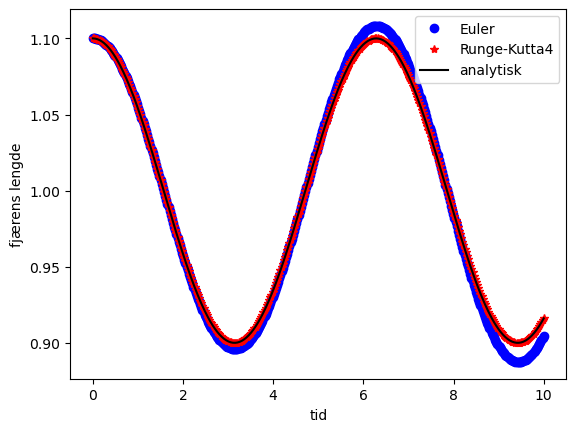

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def Euler_step(x0,v0,m,k,L,dt):
    dx = v0 * dt
    F = -k*(x0-L)
    a = F/m
    dv = a * dt
    return dx, dv

def RungeKutta_step(x0,v0,m,k,L,dt):
    dx1, dv1 = Euler_step(x0,v0,m,k,L,dt)
    dx2, dv2 = Euler_step(x0+0.5*dx1,v0+0.5*dv1,m,k,L,dt)
    dx3, dv3 = Euler_step(x0+0.5*dx2,v0+0.5*dv2,m,k,L,dt)
    dx4, dv4 = Euler_step(x0+dx3,v0+dv3,m,k,L,dt)

    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6.0
    dv = (dv1 + 2*dv2 + 2*dv3 + dv4) / 6.0
    return dx, dv


# set parameters
m = 1
k = 1
L = 1

# starting position and velocity
x_start = L * 1.1
v_start = 0

T = np.linspace(0,10,400)
dt = T[1]-T[0]

# analytical solution
x_analytic = L + (x_start-L) * np.cos(np.sqrt(k/m)*T)

# Euler's method
x_euler = 0*T
x_euler[0] = x_start
v_euler = 0*T
v_euler[0] = v_start

for i in range(len(T)-1):
    dx, dv = Euler_step(x_euler[i],v_euler[i],m,k,L,dt)
    x_euler[i+1] = x_euler[i] + dx
    v_euler[i+1] = v_euler[i] + dv

# Runge-Kutta's method
x_rk = 0*T
x_rk[0] = x_start
v_rk = 0*T
v_rk[0] = v_start

for i in range(len(T)-1):
    dx, dv = RungeKutta_step(x_rk[i],v_rk[i],m,k,L,dt)
    x_rk[i+1] = x_rk[i] + dx
    v_rk[i+1] = v_rk[i] + dv


fig, ax = plt.subplots()
ax.plot(T, x_euler, 'bo',label='Euler')
ax.plot(T, x_rk, 'r*',label='Runge-Kutta4')
ax.plot(T, x_analytic, 'k-', label='analytisk')
plt.legend()
plt.xlabel('tid')
plt.ylabel('fjærens lengde')

plt.show()


<h2>Kasteparabel</h2>

Når luftmotstandet kan negligeres følger en prosjektil eller et kastet objekt en parabelbane. Her simulerer vi banen for en ball som kastes horisontellt fra et høyt tårn (slik at den kan falle langt før den lander).

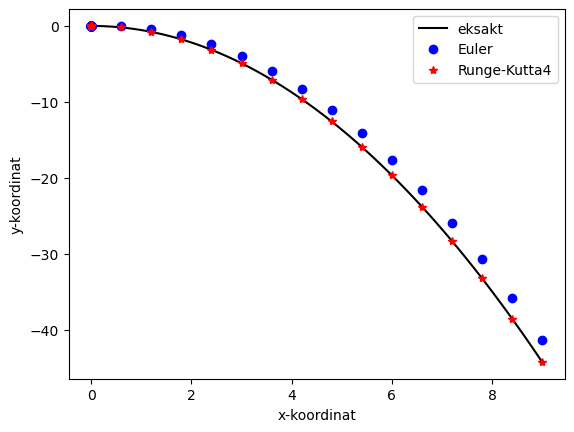

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def Euler_step(X0,Y0,Vx,Vy0,g,dt):
    dX = Vx * dt
    dY = Vy0 * dt
    dVy = -g * dt
    return dX, dY, dVy

def RungeKutta_step(X0,Y0,Vx,Vy0,g,dt):
    dX1, dY1, dVy1 = Euler_step(X0,Y0,Vx,Vy0,g,dt)
    dX2, dY2, dVy2 = Euler_step(X0+0.5*dX1,Y0+0.5*dY1,Vx,Vy0+0.5*dVy1,g,dt)
    dX3, dY3, dVy3 = Euler_step(X0+0.5*dX2,Y0+0.5*dY2,Vx,Vy0+0.5*dVy2,g,dt)
    dX4, dY4, dVy4 = Euler_step(X0+dX3,Y0+dY3,Vx,Vy0+dVy3,g,dt)

    dX = (dX1 + 2*dX2 + 2*dX3 + dX4) / 6.0
    dY = (dY1 + 2*dY2 + 2*dY3 + dY4) / 6.0
    dVy = (dVy1 + 2*dVy2 + 2*dVy3 + dVy4) / 6.0
    return dX, dY, dVy

T = np.linspace(0,3,101)
Vx = 3
g = 9.82

Xanalytic = Vx * T
Yanalytic = -0.5 * g * T**2

fig, ax = plt.subplots()
ax.plot(Xanalytic, Yanalytic, 'k-', label='eksakt')

# Euler's method
Vy_euler = 0*T
Yeuler = 0*T
Xeuler = 0*T
Vy_rk = 0*T
Yrk = 0*T
Xrk = 0*T

dt = 0.2
for i in range(15):
    dX, dY, dVy = Euler_step(Xeuler[i],Yeuler[i],Vx,Vy_euler[i],g,dt)
    Xeuler[i+1] = Xeuler[i] + dX
    Yeuler[i+1] = Yeuler[i] + dY
    Vy_euler[i+1] = Vy_euler[i] + dVy

    dX, dY, dVy = RungeKutta_step(Xrk[i],Yrk[i],Vx,Vy_rk[i],g,dt)
    Xrk[i+1] = Xrk[i] + dX
    Yrk[i+1] = Yrk[i] + dY
    Vy_rk[i+1] = Vy_rk[i] + dVy
    

line_euler, = ax.plot(Xeuler, Yeuler, 'bo',label='Euler')
line_rk, = ax.plot(Xrk, Yrk, 'r*',label='Runge-Kutta4')
plt.legend()
plt.xlabel('x-koordinat')
plt.ylabel('y-koordinat')

#ax.set_aspect('equal','box')
#fig.tight_layout()
plt.show()
